In [1]:
#imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the preprocessed data - (output of phase 1)
data = pd.read_csv('../data/processed/cleaned_data.csv')

In [3]:
#checking data entry upto 2022
data.tail(5)

,raceId,season,raceNumber,prixName,raceDate,driverId,constructorId,driverStartGridPos,driverFinalGridPos,driverFinalRank,driverRacePoints,driverLapCount,driverFatestLapNumber,driverFastestLapTime,driverFastestLapSpeed,constructorRacePoints,driverNumber,driverDateOfBirth,driverNationality,constructorName,constructorNationality,constructorChampionshipStandingPoints,constructorChampionshipStandingPosition,constructorChampionshipStandingWins,driverChampionshipStandingPoints,driverChampionshipStandingPosition,driverChampionshipStandingWins,circuitName,circuitLocation,circuitCountry,driverRaceResultStatus,driverName,driverAge,driverDnf,constructorDnf
6990,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,854,210,12,16.0,16,0.0,57.0,39.0,1:29.833,211.632,0.0,47.0,1999-03-22,German,Haas F1 Team,American,37.0,8.0,0.0,12.0,16.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,+1 Lap,Mick Schumacher,24.0,0,1
6991,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,825,210,16,17.0,17,0.0,57.0,40.0,1:31.158,208.556,0.0,20.0,1992-10-05,Danish,Haas F1 Team,American,37.0,8.0,0.0,25.0,13.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,+1 Lap,Kevin Magnussen,30.0,0,1
6992,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,1,131,5,18.0,18,0.0,55.0,42.0,1:29.788,211.738,10.0,44.0,1985-01-07,British,Mercedes,German,515.0,3.0,1.0,240.0,6.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,Hydraulics,Lewis Hamilton,38.0,0,1
6993,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,849,3,20,19.0,19,0.0,55.0,45.0,1:30.309,210.517,0.0,6.0,1995-06-29,Canadian,Williams,British,8.0,10.0,0.0,2.0,20.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,Collision damage,Nicholas Latifi,28.0,0,1
6994,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,4,214,10,0.0,20,0.0,27.0,24.0,1:30.579,209.889,6.0,14.0,1981-07-29,Spanish,Renault,French,173.0,4.0,0.0,81.0,9.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,Water leak,Fernando Alonso,42.0,0,1


In [4]:
#checking all features present
data.columns

Index(['raceId', 'season', 'raceNumber', 'prixName', 'raceDate', 'driverId',
       'constructorId', 'driverStartGridPos', 'driverFinalGridPos',
       'driverFinalRank', 'driverRacePoints', 'driverLapCount',
       'driverFatestLapNumber', 'driverFastestLapTime',
       'driverFastestLapSpeed', 'constructorRacePoints', 'driverNumber',
       'driverDateOfBirth', 'driverNationality', 'constructorName',
       'constructorNationality', 'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins',
       'driverChampionshipStandingPoints',
       'driverChampionshipStandingPosition', 'driverChampionshipStandingWins',
       'circuitName', 'circuitLocation', 'circuitCountry',
       'driverRaceResultStatus', 'driverName', 'driverAge', 'driverDnf',
       'constructorDnf'],
      dtype='object')

In [5]:
#selecting features depending on correlation matrix from EDA performed in Phase 1
features = ['season','driverId','constructorId', 'driverStartGridPos', 
            'driverFinalGridPos', 'driverChampionshipStandingPosition', 
            'constructorChampionshipStandingPosition']

#Dropping unnecessary features and setting target variable - driver ranking in each race
X = data[features]
y = data['driverFinalRank']

# split dataset into training(80%) and testing sets (20%) and stratifying over season
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=data['season'])

# Scaling the features to ensure all features are at same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the SVM model
svm_model = SVC()

# Define the hyperparameters to tune
param_dist = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'degree': [2, 3, 4, 5, 6, 7, 8], 
              'gamma': ['scale', 'auto']}

# Define the randomized search
svm_rs_model = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=100, cv=2, 
                            scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the randomized search to the training data
svm_rs_model.fit(X_train_scaled, y_train)

# Print the best hyperparameters
#print("Best hyperparameters: ", svm_rs.best_params_)

# Make predictions on the testing data using the best model
y_pred = svm_rs_model.predict(X_test_scaled)


In [6]:
# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 84.06%


In [8]:
# Printing the best hyperparameters
print("Best hyperparameters: ", svm_rs_model.best_params_)

Best hyperparameters:  {'kernel': 'rbf', 'gamma': 'auto', 'degree': 8, 'C': 100}


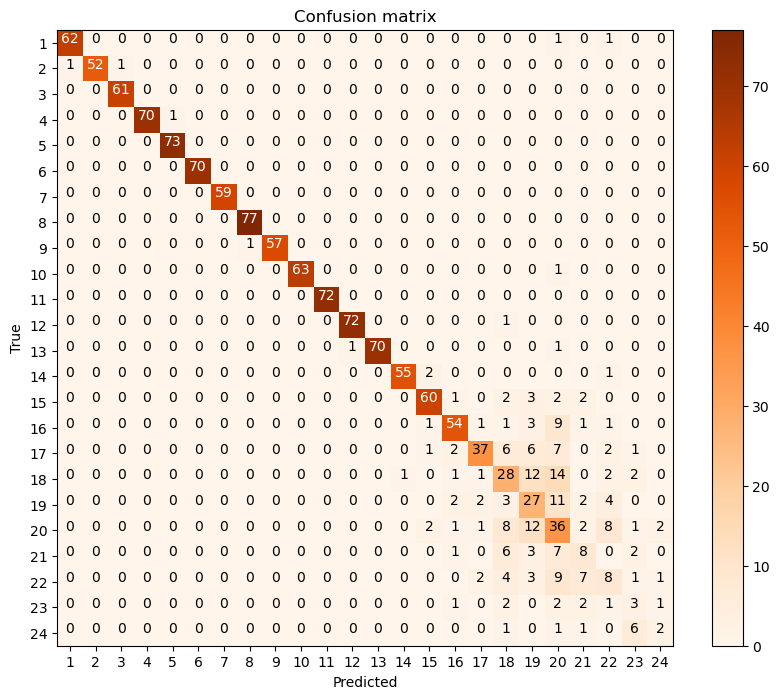

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
plt.imshow(cm, cmap=plt.cm.Oranges)
plt.title("Confusion matrix")
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [10]:
# Calculating classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.98      0.97      0.98        64
           2       1.00      0.96      0.98        54
           3       0.98      1.00      0.99        61
           4       1.00      0.99      0.99        71
           5       0.99      1.00      0.99        73
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        59
           8       0.99      1.00      0.99        77
           9       1.00      0.98      0.99        58
          10       1.00      0.98      0.99        64
          11       1.00      1.00      1.00        72
          12       0.99      0.99      0.99        73
          13       1.00      0.97      0.99        72
          14       0.98      0.95      0.96        58
          15       0.91      0.86      0.88        70
          16       0.86      0.76      0.81        71
          17       0.84      0.60      0.70        62
          18       0.45    

<Axes: >

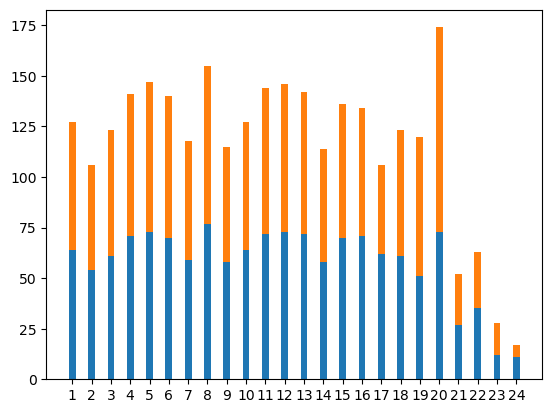

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique class labels
labels = np.unique(y_test)

# Get counts of actual and predicted labels for each class
actual_counts = []
pred_counts = []
for label in labels:
    actual_counts.append(np.sum(y_test == label))
    pred_counts.append(np.sum(y_pred == label))

# Set bar width
width = 0.35

# Set x-axis values
x = np.arange(len(labels))

# Plot stacked bar chart
fig, ax = plt.subplots()
ax.bar(x, actual_counts, width, label='Actual')
ax.bar(x, pred_counts, width, bottom=actual_counts, label='Predicted')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax


Text(0, 0.5, 'Density')

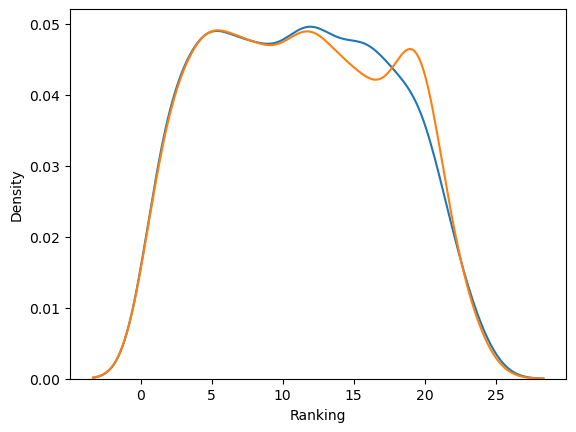

In [15]:
import seaborn as sns

# Plot kernel density estimation plot
sns.kdeplot(y_test, label='Actual')
sns.kdeplot(y_pred, label='Predicted')
plt.xlabel('Ranking')
plt.ylabel('Density')


([<matplotlib.axis.XTick at 0x7ff5ac973eb0>,
 [Text(1, 0, 'Actual'), Text(2, 0, 'Predicted')])

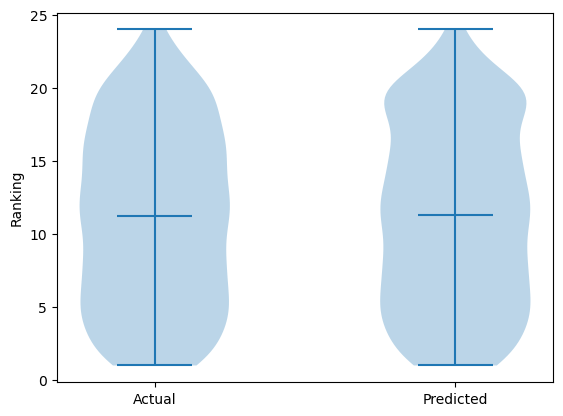

In [16]:
import matplotlib.pyplot as plt

# Plot violin plot
plt.violinplot([y_test, y_pred], showmeans=True)
plt.ylabel('Ranking')
plt.xticks([1, 2], ['Actual', 'Predicted'])
